# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.


***DESARROLLO***

***ACTIVIDAD 1*** 

En esta sección se importa las librerias necesarias para el trabajo y el datasetss, además se muestran las primeras filas de la mismas para verificar que se haya importado correctaente

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


df_calificaciones = pd.read_csv('datasets_calificaciones.csv')

print("Primeras 5 filas del dataset:")
print(df_calificaciones.head())


Primeras 5 filas del dataset:
        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%


***ACTIVIDAD 2***

Aquí se realiza la exploración de los adatos, se muestran las primeras filas de dataset usando el metodo head, luego con info obtenemos la informacion general y con describe las estadisticas 

In [ ]:
print("Primeras filas del dataset:")
print(df_calificaciones.head())

print("\nInformación del DataFrame:")
print(df_calificaciones.info())

print("\nResumen estadístico de columnas numéricas:")
print(df_calificaciones.describe())


Primeras 5 filas del dataset:
        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None

Resumen estadístico de columnas numéricas:
        estudian

***ACTIVIDAD 3***

Normalizamos los datos, empezamos con la normalización de nombre, valores faltantess, normalizacon de la columna asistencia, cambiar valores atipicos

In [ ]:



data = {
    'Estudiante': ['ana', 'luis', 'Carlos ', 'marta'],
    'Materia': ['matematicas', 'historia', 'ciencias', 'fisica'],
    'Parcial 1': [8, 9, np.nan, 6], 
    'Parcial 2': [7, 9, 8, 5],
    'Final': [9, 8, 6, 7],
    'Asistencia': ['P', 'A', 'P', 'A']  
}

df_calificaciones = pd.DataFrame(data)


df_calificaciones['Estudiante'] = df_calificaciones['Estudiante'].str.strip().str.title()
df_calificaciones['Materia'] = df_calificaciones['Materia'].str.strip().str.title()


df_calificaciones['Parcial 1'].fillna(df_calificaciones['Parcial 1'].mean(), inplace=True)


df_calificaciones['Asistencia'] = df_calificaciones['Asistencia'].str.upper()  # Convertir todo a mayúsculas


df_calificaciones = df_calificaciones[(df_calificaciones['Parcial 1'] >= 0) & (df_calificaciones['Parcial 1'] <= 10)]
df_calificaciones = df_calificaciones[(df_calificaciones['Parcial 2'] >= 0) & (df_calificaciones['Parcial 2'] <= 10)]
df_calificaciones = df_calificaciones[(df_calificaciones['Final'] >= 0) & (df_calificaciones['Final'] <= 10)]


print(df_calificaciones)


  Estudiante      Materia  Parcial 1  Parcial 2  Final Asistencia
0        Ana  Matematicas   8.000000          7      9          P
1       Luis     Historia   9.000000          9      8          A
2     Carlos     Ciencias   7.666667          8      6          P
3      Marta       Fisica   6.000000          5      7          A


C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_13748\3554910784.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_calificaciones['Parcial 1'].fillna(df_calificaciones['Parcial 1'].mean(), inplace=True)


***ACTIVIDAD 4***
se calcularon nuevamente las estadísticas descriptivas para observar el impacto de la limpieza de los datos en las variables numéricas. Además, se calcularon estadísticas específicas por grupo, como el promedio de calificaciones por materia, para obtener un análisis más detallado del desempeño académico.











In [12]:
estadisticas_descriptivas = df_calificaciones[['Parcial 1', 'Parcial 2', 'Final']].describe()
promedio_por_materia = df_calificaciones.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean()
df_calificaciones['Calificación'] = df_calificaciones[['Parcial 1', 'Parcial 2', 'Final']].mean(axis=1)
estadisticas_calificacion = df_calificaciones['Calificación'].describe()

print("Estadísticas Descriptivas Generales:")
print(estadisticas_descriptivas)
print("\nPromedio de Calificaciones por Materia:")
print(promedio_por_materia)
print("\nEstadísticas Descriptivas de la Calificación Final:")
print(estadisticas_calificacion)


Estadísticas Descriptivas Generales:
       Parcial 1  Parcial 2     Final
count   4.000000   4.000000  4.000000
mean    7.666667   7.250000  7.500000
std     1.247219   1.707825  1.290994
min     6.000000   5.000000  6.000000
25%     7.250000   6.500000  6.750000
50%     7.833333   7.500000  7.500000
75%     8.250000   8.250000  8.250000
max     9.000000   9.000000  9.000000

Promedio de Calificaciones por Materia:
             Parcial 1  Parcial 2  Final
Materia                                 
Ciencias      7.666667        8.0    6.0
Fisica        6.000000        5.0    7.0
Historia      9.000000        9.0    8.0
Matematicas   8.000000        7.0    9.0

Estadísticas Descriptivas de la Calificación Final:
count    4.000000
mean     7.472222
std      1.145307
min      6.000000
25%      6.916667
50%      7.611111
75%      8.166667
max      8.666667
Name: Calificación, dtype: float64


***ACTIVIDAD 5***
se utilizó la librería Matplotlib para crear varias visualizaciones que ayudan a comprender mejor los datos.

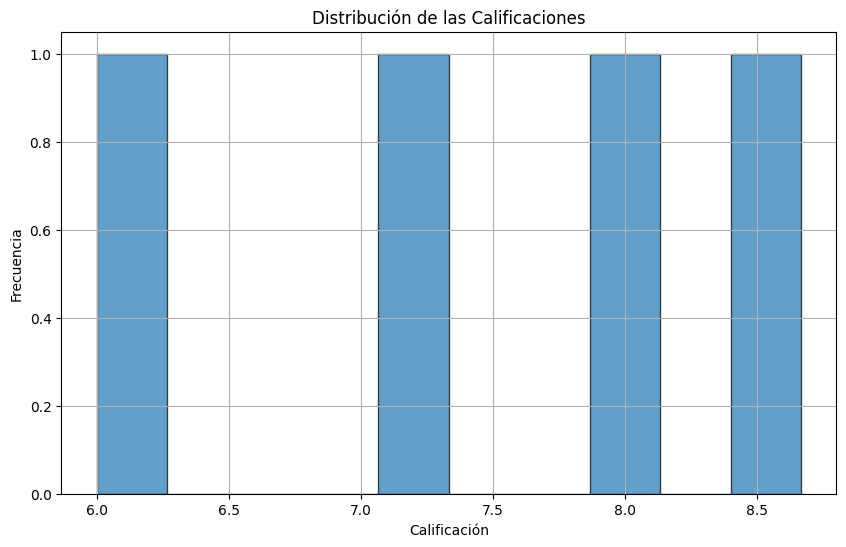

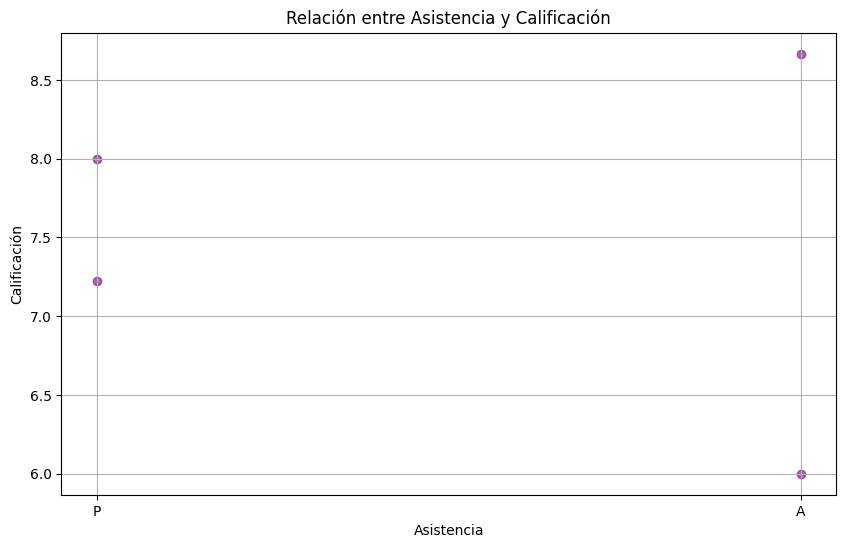

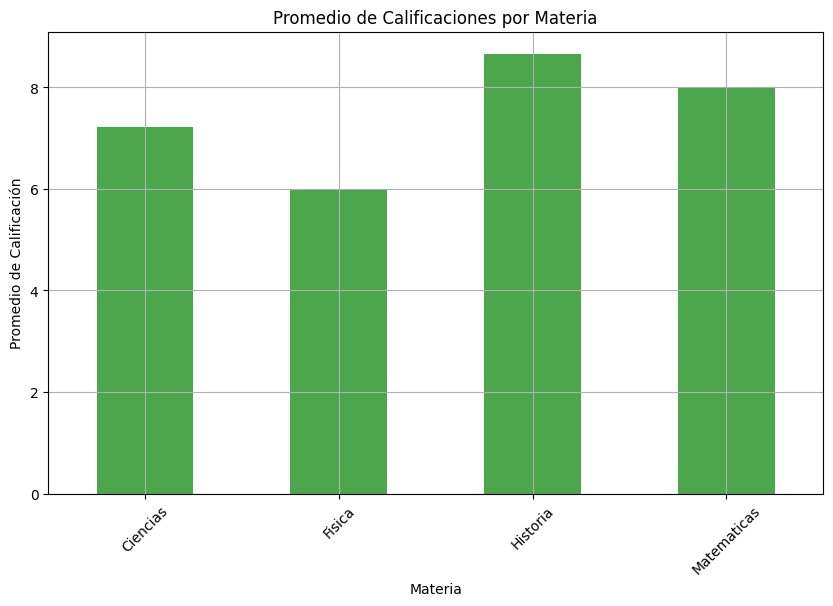

In [14]:

plt.figure(figsize=(10,6))
plt.hist(df_calificaciones['Calificación'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribución de las Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(df_calificaciones['Asistencia'], df_calificaciones['Calificación'], color='purple', alpha=0.6)
plt.title('Relación entre Asistencia y Calificación')
plt.xlabel('Asistencia')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()


promedio_materia = df_calificaciones.groupby('Materia')['Calificación'].mean()
plt.figure(figsize=(10,6))
promedio_materia.plot(kind='bar', color='green', alpha=0.7)
plt.title('Promedio de Calificaciones por Materia')
plt.xlabel('Materia')
plt.ylabel('Promedio de Calificación')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


***ACTIVIDAD 6*** 
se exportaron los datos procesados del DataFrame a una base de datos SQLite utilizando Pandas

In [15]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('calificaciones.db')


df_calificaciones.to_sql('calificaciones', conn, if_exists='replace', index=False)


conn.close()

print("Datos exportados a SQLite correctamente.")


Datos exportados a SQLite correctamente.
